In [48]:
def spin_to_key(s,N):
    key=np.zeros(len(s),dtype=int)

    for i in range(N):
      key+=(2**i)*s[i] #(1-s[:,N-i-1])//2
    return key

def spin_to_key_nv(s):
    N=len(s)
    key=0
    for i in range(len(s)):
      key+=(2**i)*s[N-i-1] #(1-s[N-i-1])/2
    return int(key)

In [49]:
import quimb as qu
import quimb.tensor as qtn
import numpy as np

# Define a sample MPS, e.g., random state of n qubits
N = 5  # number of qubits
psi = qtn.MPS_rand_state(N, bond_dim=4, dtype='complex128', seed=42)

# Function to sample a bitstring from the MPS


# Sample multiple bitstrings
num_samples = 1000
samples = psi.sample(num_samples,)

keys = []
for i, s in enumerate(samples):
    spin, prob = s
    keys.append(spin_to_key_nv(spin)) 


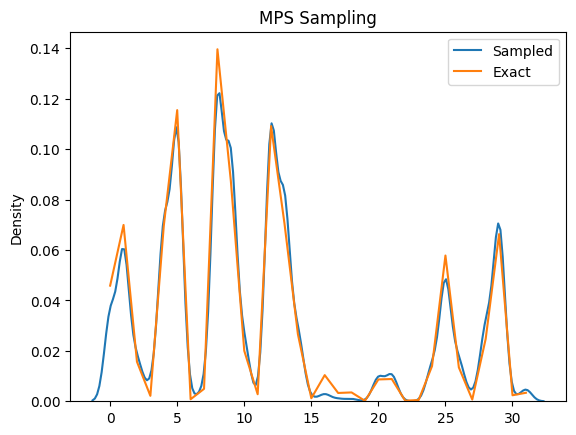

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.kdeplot(keys, bw_adjust=0.2, label="Sampled")
#plt.hist(keys, bins=np.arange(0,2**N), density=True)
plt.plot(np.abs(psi.to_dense())**2, label='Exact')

plt.legend()
plt.title("MPS Sampling")
plt.show()